Kayla Burge

The data can be found at https://www.census.gov/programs-surveys/acs/microdata/access/2019.html.
using: 

FTP: file transfer protocol (getting it fromthe internet to a data science environemnt)
SFTP (encripted, secured)

In [1]:
# import packages and functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import wget # wget will need to be installed use pip install wget
from zipfile import ZipFile
import plotnine
import warnings

In [2]:
# eliminate warnings
# https://www.geeksforgeeks.org/how-to-disable-python-warnings/#
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [3]:
# reading in the data from the Census Bureau
# the file at the Census is a zipped file
# https://www.geeksforgeeks.org/working-zip-files-python/
# https://pythonguides.com/download-zip-file-from-url-using-python/
zfile = 'https://www2.census.gov/programs-surveys/acs/data/pums/2019/1-Year/csv_pfl.zip'
wget.download(zfile)
file_name = "csv_pfl.zip"
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    print('Extracting all the files now...')
    zip.extractall()
    print(' Done.')

-1 / unknownFile Name                                             Modified             Size
psam_p12.csv                                   2020-08-06 09:04:02    145196276
ACS2019_PUMS_README.pdf                        2020-10-01 13:10:04       220662
Extracting all the files now...
 Done.


In [4]:
# read the csv file into a pandas data frame
df = pd.read_csv('psam_p12.csv')
df.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2019GQ0000016,5,1,8500,3,12,1010145,32,33,...,32,32,60,30,5,6,5,32,32,60
1,P,2019GQ0000017,5,1,1104,3,12,1010145,13,56,...,12,12,12,1,13,23,12,24,25,12
2,P,2019GQ0000030,5,1,5701,3,12,1010145,20,33,...,21,0,0,20,21,0,43,22,44,21
3,P,2019GQ0000040,5,1,101,3,12,1010145,45,19,...,47,87,45,89,48,45,7,47,47,48
4,P,2019GQ0000045,5,1,8620,3,12,1010145,48,48,...,51,47,48,50,90,0,50,48,50,1


In [5]:
# you can get the numeric mean of each numeric column using the .mean function 
print(df.mean(numeric_only=True))

DIVISION       5.000000
SPORDER        1.970895
PUMA        7126.471631
REGION         3.000000
ST            12.000000
               ...     
PWGTP76      104.619409
PWGTP77      104.619409
PWGTP78      104.619409
PWGTP79      104.619409
PWGTP80      104.619409
Length: 284, dtype: float64


In [6]:
# how many rows?
len(df)

205294

In [7]:
df.dtypes

RT          object
SERIALNO    object
DIVISION     int64
SPORDER      int64
PUMA         int64
             ...  
PWGTP76      int64
PWGTP77      int64
PWGTP78      int64
PWGTP79      int64
PWGTP80      int64
Length: 288, dtype: object

In [8]:
# subset the data to just Melbourne/West Melbourne observations
# https://www.census.gov/geographies/reference-maps/2010/geo/2010-pumas/florida.html
# Gainesville is PUMA 00903. This is a numeric, so drop the leading zeros.
melb = df[df["PUMA"]==903]
melb.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
45,P,2019GQ0000836,5,1,903,3,12,1010145,57,80,...,60,109,61,54,108,57,5,113,111,113
211,P,2019GQ0003862,5,1,903,3,12,1010145,87,20,...,166,89,14,165,87,162,90,13,91,13
349,P,2019GQ0006446,5,1,903,3,12,1010145,77,80,...,79,76,6,72,75,144,152,6,6,6
380,P,2019GQ0006926,5,1,903,3,12,1010145,42,19,...,41,41,39,41,6,42,78,8,42,8
441,P,2019GQ0008238,5,1,903,3,12,1010145,70,22,...,135,71,11,11,71,70,73,73,74,130


In [9]:
# shape of the melb data frame (rows, columns)
melb.shape

(1230, 288)

In [10]:
# the CIT variable represents the citizenship categories of the PUMS Person Survey
# https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2019.pdf
# https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
melb['CIT'].value_counts().sort_values(ascending=False)

CIT
1    1078
4      68
2      36
5      30
3      18
Name: count, dtype: int64

In [11]:
# change the result into a series
cit = melb['CIT'].value_counts().sort_values(ascending=False)
cit

CIT
1    1078
4      68
2      36
5      30
3      18
Name: count, dtype: int64

In [12]:
ser = pd.Series(cit)
print(ser)

CIT
1    1078
4      68
2      36
5      30
3      18
Name: count, dtype: int64


In [13]:
# https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/
# Using DataFrame.copy() create new DaraFrame.

df1 = melb[['WAGP', 'CIT']].copy()
df1.head()

,WAGP,CIT
45,0.0,1
211,0.0,5
349,0.0,1
380,3300.0,1
441,8000.0,1


In [14]:
df1.fillna(0, inplace=True)
df1.head(20)

,WAGP,CIT
45,0.0,1
211,0.0,5
349,0.0,1
380,3300.0,1
441,8000.0,1
538,0.0,1
545,30000.0,1
583,14000.0,1
644,0.0,1
798,3000.0,1


In [15]:
df1.shape

(1230, 2)

<Axes: xlabel='CIT', ylabel='WAGP'>

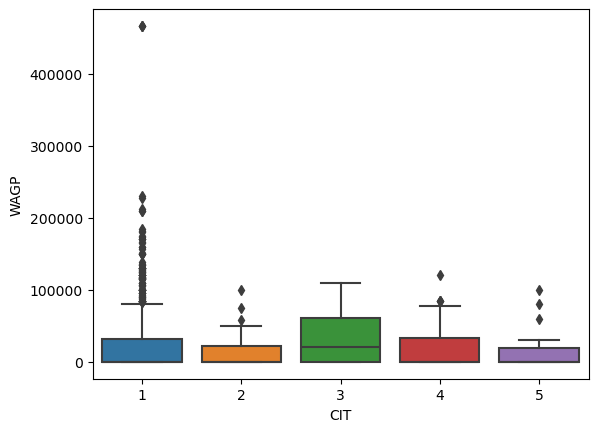

In [16]:
# citizenship status by wages
sns.boxplot( x=df1["CIT"], y=df1["WAGP"] )

[Text(0, 0.0, '0'),
 Text(0, 25000.0, '25,000'),
 Text(0, 50000.0, '50,000'),
 Text(0, 75000.0, '75,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 125000.0, '125,000'),
 Text(0, 150000.0, '150,000'),
 Text(0, 175000.0, '175,000'),
 Text(0, 200000.0, '200,000')]

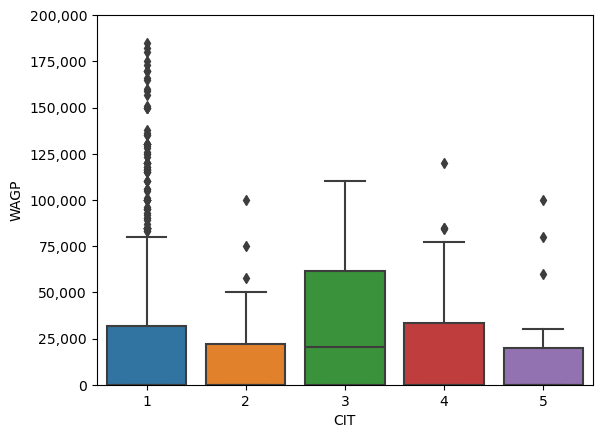

In [17]:
sns.boxplot( x=df1["CIT"], y=df1["WAGP"] )
# limit the y axis for the super long outliers
plt.ylim([0, 200000])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

[Text(0, 0.0, '0'),
 Text(0, 25000.0, '25,000'),
 Text(0, 50000.0, '50,000'),
 Text(0, 75000.0, '75,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 125000.0, '125,000'),
 Text(0, 150000.0, '150,000'),
 Text(0, 175000.0, '175,000'),
 Text(0, 200000.0, '200,000')]

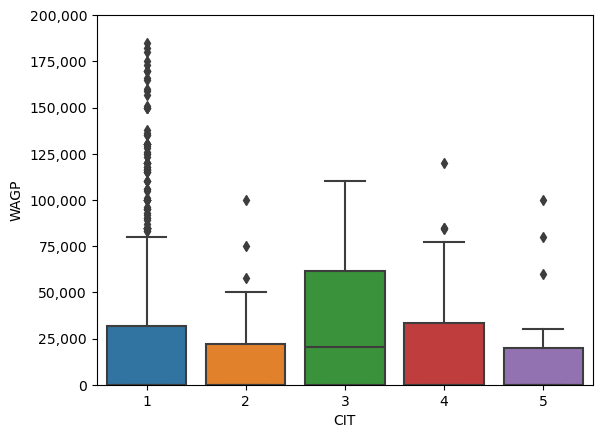

In [18]:
sns.boxplot( x=df1["CIT"], y=df1["WAGP"] )
# limit the y axis for the super long outliers
plt.ylim([0, 200000])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

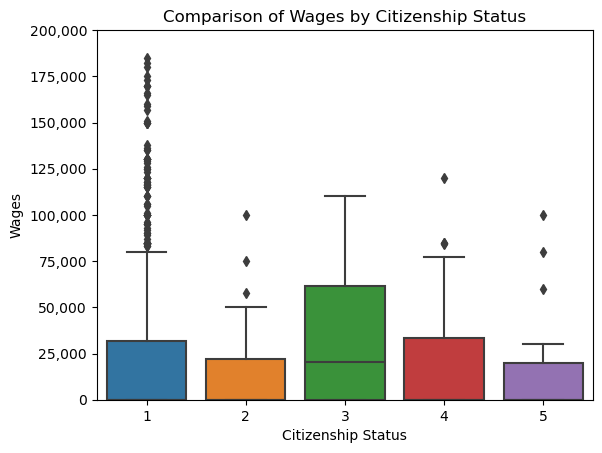

In [19]:
#add axis labels and a title to the graph
sns.boxplot( x=df1["CIT"], y=df1["WAGP"] )
# add plot labels
plt.xlabel('Citizenship Status')
plt.ylabel('Wages')
plt.title('Comparison of Wages by Citizenship Status')

plt.ylim([0, 200000])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [20]:
# https://www.datasciencemadesimple.com/convert-column-to-categorical-pandas-python-2/
df1['CIT'] = pd.Categorical(df1.CIT)
df1.dtypes

WAGP     float64
CIT     category
dtype: object

In [21]:
# count the number of observations by category in the COW variable
df1["CIT"].value_counts()

CIT
1    1078
4      68
2      36
5      30
3      18
Name: count, dtype: int64

In [22]:
# https://pbpython.com/categorical-encoding.html
CITCat = {"CIT":     {1: "Born in the U.S.", 2 : "Born in U.S. Islands" , 3:"Born abroad", 4: "U.S. citizen by naturalization", 5: "Not a citizen",
                     }}
df1 = df1.replace(CITCat)
df1.head()

,WAGP,CIT
45,0.0,Born in the U.S.
211,0.0,Not a citizen
349,0.0,Born in the U.S.
380,3300.0,Born in the U.S.
441,8000.0,Born in the U.S.


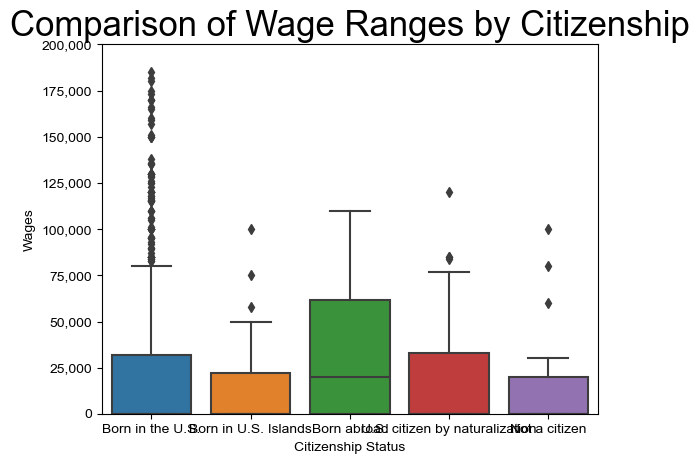

In [23]:
sns.boxplot( x=df1["CIT"], y=df1["WAGP"] )
# add plot labels
plt.xlabel('Citizenship Status')
plt.ylabel('Wages')
plt.title('Comparison of Wage Ranges by Citizenship')

plt.title('Comparison of Wage Ranges by Citizenship', fontsize=25)  # Adjust fontsize as needed

# Set rotation for x-axis labels
#plt.xticks(rotation=45)  # Adjust rotation angle as needed


plt.ylim([0, 200000])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

sns.set(rc = {'figure.figsize':(20,10)})
plt.show()